# Analyzing data from the National Bouy System

## References 

- National Data Buoy Center: http://www.ndbc.noaa.gov/
- Data for Station 44255 - NE Burgeo Bank: http://www.ndbc.noaa.gov/station_realtime.php?station=44255
- How a buoy get an ID: http://www.ndbc.noaa.gov/staid.shtml
- All the station IDs: http://www.ndbc.noaa.gov/to_station.shtml

In [4]:
import requests
url = 'http://www.ndbc.noaa.gov/data/realtime2/44255.txt'
response = requests.get(url)

In [15]:
import pandas
import StringIO

In [31]:
data_as_file = StringIO.StringIO(response.text)
data = pandas.read_csv(data_as_file, delim_whitespace=True, usecols=[0, 1, 2, 3, 6, 12], skiprows=[1], parse_dates=[[0,1,2,3]])

In [40]:
print data 

           #YY_MM_DD_hh WSPD    PRES
0   2015-06-16 19:00:00  9.0  1017.4
1   2015-06-16 18:00:00  7.0  1018.0
2   2015-06-16 17:00:00  6.0  1018.9
3   2015-06-16 16:00:00  4.0  1019.3
4   2015-06-16 15:00:00  5.0  1019.6
6   2015-06-16 13:00:00  7.0  1019.7
7   2015-06-16 12:00:00  8.0  1020.2
8   2015-06-16 10:00:00  6.0  1020.4
9   2015-06-16 09:00:00  6.0  1020.6
10  2015-06-16 08:00:00  5.0  1020.8
11  2015-06-16 07:00:00  4.0  1020.9
12  2015-06-16 06:00:00  6.0  1021.2
13  2015-06-16 05:00:00  5.0  1021.3
14  2015-06-16 04:00:00  6.0  1021.3
15  2015-06-16 03:00:00  6.0  1021.4
16  2015-06-16 02:00:00  6.0  1021.6
17  2015-06-16 01:00:00  5.0  1021.7
18  2015-06-16 00:00:00  5.0  1021.4
19  2015-06-15 23:00:00  5.0  1020.9
20  2015-06-15 22:00:00  5.0  1020.5
21  2015-06-15 21:00:00  6.0  1020.7
22  2015-06-15 20:00:00  5.0  1020.4
23  2015-06-15 19:00:00  6.0  1020.7
24  2015-06-15 18:00:00  5.0  1020.6
25  2015-06-15 17:00:00  4.0  1020.4
26  2015-06-15 16:00:00  4.0  1020.6
2

In [38]:
print data['WSPD']

0     9.0
1     7.0
2     6.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     6.0
9     6.0
10    5.0
11    4.0
12    6.0
13    5.0
14    6.0
...
984    4.0
985    4.0
986    3.0
987    4.0
988    5.0
989    5.0
990    4.0
991    5.0
992    4.0
993    4.0
994    5.0
995    6.0
996    5.0
997    6.0
998    7.0
Name: WSPD, Length: 999, dtype: object


In [45]:
import numpy
data = data.replace('MM', numpy.nan)
data = data.dropna(axis=0)
data = data.convert_objects(convert_numeric=True)

.nan =not a number converts MM to nan;
this is done to drop a space where there is no data (nan);
convert string values to numeric so the plot will run

In [44]:
data.dtypes

#YY_MM_DD_hh    datetime64[ns]
WSPD                    object
PRES                    object
dtype: object

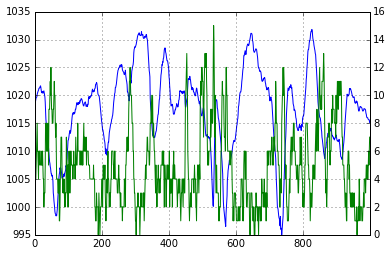

In [48]:
%matplotlib inline
import matplotlib.pyplot
data.PRES.plot()
data.WSPD.plot(secondary_y=True, style ='g')